## Project: Milestone 2 - Cleaning & Formatting Flat File Source

In [2]:
# First I will import some needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import chardet

In [3]:
pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org pip --upgrade --user

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/Users/Robyn/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Import CSV File - Provisional COVID-19 Deaths by Sex and Age 

In [6]:
Covid_Deaths_Data = pd.read_csv("Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")
Covid_Deaths_Data

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age_Group,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_and_COVID_19_Deaths,Influenza_Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,All Ages,658754.0,5587895.0,596210.0,329882.0,9288.0,933049.0,NaN
1,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,Under 1 year,105.0,31744.0,344.0,13.0,22.0,458.0,NaN
2,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,0-17 years,439.0,56092.0,949.0,103.0,188.0,1473.0,NaN
3,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,1-4 years,54.0,5881.0,192.0,11.0,65.0,300.0,NaN
4,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,5-14 years,145.0,9374.0,275.0,43.0,80.0,457.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66091,9/15/21,9/1/21,9/11/21,By Month,2021.0,9.0,Puerto Rico,Female,50-64 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
66092,9/15/21,9/1/21,9/11/21,By Month,2021.0,9.0,Puerto Rico,Female,55-64 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
66093,9/15/21,9/1/21,9/11/21,By Month,2021.0,9.0,Puerto Rico,Female,65-74 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
66094,9/15/21,9/1/21,9/11/21,By Month,2021.0,9.0,Puerto Rico,Female,75-84 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Replace Headers

In [7]:
# First I will use list and .columns function with dataframe object to 
# pull a list of my dataframes headers. 
list(Covid_Deaths_Data.columns)

['Data As Of',
 'Start Date',
 'End Date',
 'Group',
 'Year',
 'Month',
 'State',
 'Sex',
 'Age_Group',
 'COVID_19_Deaths',
 'Total_Deaths',
 'Pneumonia_Deaths',
 'Pneumonia_and_COVID_19_Deaths',
 'Influenza_Deaths',
 'Pneumonia, Influenza, or COVID-19 Deaths',
 'Footnote']

As seen above from the headers for the most part all the names are short and to the point. But I will update some of the columns headers.

In [8]:
# I will use pandas .rename function to edit my headers names. As I 
# will be updating the header "Data As Of" to "Date Pulled" and 
# "Footnote" to "Notes" and also change "Pneumonia, Influenza, 
# or COVID-19 Deaths" to "Pneumonia, Influenza, and COVID-19 Deaths".
Covid_Deaths_Data=Covid_Deaths_Data.rename(columns={'Data As Of':'Date_Pulled', 
                                  'Footnote':'Notes',
                                  'Pneumonia, Influenza, or COVID-19 Deaths':'Pneumonia_Influenza_and_COVID_19_Deaths'})
Covid_Deaths_Data

,Date_Pulled,Start Date,End Date,Group,Year,Month,State,Sex,Age_Group,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_and_COVID_19_Deaths,Influenza_Deaths,Pneumonia_Influenza_and_COVID_19_Deaths,Notes
0,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,All Ages,658754.0,5587895.0,596210.0,329882.0,9288.0,933049.0,NaN
1,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,Under 1 year,105.0,31744.0,344.0,13.0,22.0,458.0,NaN
2,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,0-17 years,439.0,56092.0,949.0,103.0,188.0,1473.0,NaN
3,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,1-4 years,54.0,5881.0,192.0,11.0,65.0,300.0,NaN
4,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,5-14 years,145.0,9374.0,275.0,43.0,80.0,457.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66091,9/15/21,9/1/21,9/11/21,By Month,2021.0,9.0,Puerto Rico,Female,50-64 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
66092,9/15/21,9/1/21,9/11/21,By Month,2021.0,9.0,Puerto Rico,Female,55-64 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
66093,9/15/21,9/1/21,9/11/21,By Month,2021.0,9.0,Puerto Rico,Female,65-74 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
66094,9/15/21,9/1/21,9/11/21,By Month,2021.0,9.0,Puerto Rico,Female,75-84 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [9]:
# Next I will pull a list of my dataframes headers again to see 
# the updated names. 
list(Covid_Deaths_Data.columns)

['Date_Pulled',
 'Start Date',
 'End Date',
 'Group',
 'Year',
 'Month',
 'State',
 'Sex',
 'Age_Group',
 'COVID_19_Deaths',
 'Total_Deaths',
 'Pneumonia_Deaths',
 'Pneumonia_and_COVID_19_Deaths',
 'Influenza_Deaths',
 'Pneumonia_Influenza_and_COVID_19_Deaths',
 'Notes']

## Format data into a more readable format

In [10]:
# First I will update the Months from numbers to the actual month so 
# it is more ledgible once I create graphs.
Covid_Deaths_Data.loc[Covid_Deaths_Data['Month'] == 1, 'Month']="January"

In [11]:
Covid_Deaths_Data.loc[Covid_Deaths_Data['Month'] == 2, 'Month']="February"

In [12]:
Covid_Deaths_Data.loc[Covid_Deaths_Data['Month'] == 3, 'Month']="March"

In [13]:
Covid_Deaths_Data.loc[Covid_Deaths_Data['Month'] == 4, 'Month']="April"

In [14]:
Covid_Deaths_Data.loc[Covid_Deaths_Data['Month'] == 5, 'Month']="May"

In [15]:
Covid_Deaths_Data.loc[Covid_Deaths_Data['Month'] == 6, 'Month']="June"

In [16]:
Covid_Deaths_Data.loc[Covid_Deaths_Data['Month'] == 7, 'Month']="July"

In [17]:
Covid_Deaths_Data.loc[Covid_Deaths_Data['Month'] == 8, 'Month']="August"

In [18]:
Covid_Deaths_Data.loc[Covid_Deaths_Data['Month'] == 9, 'Month']="September"

In [19]:
Covid_Deaths_Data.loc[Covid_Deaths_Data['Month'] == 10, 'Month']="October"

In [20]:
Covid_Deaths_Data.loc[Covid_Deaths_Data['Month'] == 11, 'Month']="November"

In [21]:
Covid_Deaths_Data.loc[Covid_Deaths_Data['Month'] == 12, 'Month']="December"
Covid_Deaths_Data

,Date_Pulled,Start Date,End Date,Group,Year,Month,State,Sex,Age_Group,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_and_COVID_19_Deaths,Influenza_Deaths,Pneumonia_Influenza_and_COVID_19_Deaths,Notes
0,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,All Ages,658754.0,5587895.0,596210.0,329882.0,9288.0,933049.0,NaN
1,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,Under 1 year,105.0,31744.0,344.0,13.0,22.0,458.0,NaN
2,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,0-17 years,439.0,56092.0,949.0,103.0,188.0,1473.0,NaN
3,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,1-4 years,54.0,5881.0,192.0,11.0,65.0,300.0,NaN
4,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,5-14 years,145.0,9374.0,275.0,43.0,80.0,457.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66091,9/15/21,9/1/21,9/11/21,By Month,2021.0,September,Puerto Rico,Female,50-64 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
66092,9/15/21,9/1/21,9/11/21,By Month,2021.0,September,Puerto Rico,Female,55-64 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
66093,9/15/21,9/1/21,9/11/21,By Month,2021.0,September,Puerto Rico,Female,65-74 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
66094,9/15/21,9/1/21,9/11/21,By Month,2021.0,September,Puerto Rico,Female,75-84 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [22]:
# Next I will create a new dataframe for 2020 and another for 2021
Covid_2020_Deaths_Data = Covid_Deaths_Data[Covid_Deaths_Data.Year == 2020]
Covid_2020_Deaths_Data.head()

,Date_Pulled,Start Date,End Date,Group,Year,Month,State,Sex,Age_Group,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_and_COVID_19_Deaths,Influenza_Deaths,Pneumonia_Influenza_and_COVID_19_Deaths,Notes
2754,9/15/21,1/1/20,12/31/20,By Year,2020.0,NaN,United States,All Sexes,All Ages,385248.0,3389983.0,351875.0,179907.0,8786.0,564851.0,NaN
2755,9/15/21,1/1/20,12/31/20,By Year,2020.0,NaN,United States,All Sexes,Under 1 year,52.0,19645.0,241.0,9.0,21.0,305.0,NaN
2756,9/15/21,1/1/20,12/31/20,By Year,2020.0,NaN,United States,All Sexes,0-17 years,198.0,34204.0,625.0,36.0,179.0,966.0,NaN
2757,9/15/21,1/1/20,12/31/20,By Year,2020.0,NaN,United States,All Sexes,1-4 years,25.0,3539.0,132.0,4.0,61.0,214.0,NaN
2758,9/15/21,1/1/20,12/31/20,By Year,2020.0,NaN,United States,All Sexes,5-14 years,68.0,5644.0,172.0,12.0,76.0,304.0,NaN


In [23]:
# Next I will create a new dataframe for 2021
Covid_2021_Deaths_Data = Covid_Deaths_Data[Covid_Deaths_Data.Year == 2021]
Covid_2021_Deaths_Data.head()

,Date_Pulled,Start Date,End Date,Group,Year,Month,State,Sex,Age_Group,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_and_COVID_19_Deaths,Influenza_Deaths,Pneumonia_Influenza_and_COVID_19_Deaths,Notes
2805,9/15/21,1/1/21,9/11/21,By Year,2021.0,NaN,United States,All Sexes,All Ages,273506.0,2197912.0,244335.0,149975.0,502.0,368198.0,NaN
2806,9/15/21,1/1/21,9/11/21,By Year,2021.0,NaN,United States,All Sexes,Under 1 year,53.0,12099.0,103.0,4.0,1.0,153.0,NaN
2807,9/15/21,1/1/21,9/11/21,By Year,2021.0,NaN,United States,All Sexes,0-17 years,241.0,21888.0,324.0,67.0,9.0,507.0,NaN
2808,9/15/21,1/1/21,9/11/21,By Year,2021.0,NaN,United States,All Sexes,1-4 years,29.0,2342.0,60.0,7.0,4.0,86.0,NaN
2809,9/15/21,1/1/21,9/11/21,By Year,2021.0,NaN,United States,All Sexes,5-14 years,77.0,3730.0,103.0,31.0,4.0,153.0,NaN


These two data sets will allow me to view data for each year individually 

## Identify outliers and bad data

In [24]:
# First I will check and see if any of the columns conatin 
# NaNs by using the % operator
print("Does the 'Sex'column contains NaN: %r " % Covid_Deaths_Data.Sex.isnull().values.any())
print("Does the 'Age_Group'column contains NaN: %r " % Covid_Deaths_Data.Age_Group.isnull().values.any())
print("Does the 'COVID_19_Deaths'column contains NaN: %r " % Covid_Deaths_Data.COVID_19_Deaths.isnull().values.any())
print("Does the 'Total_Deaths'column contains NaN: %r " % Covid_Deaths_Data.Total_Deaths.isnull().values.any())
print("Does the 'Pneumonia_Deaths'column contains NaN: %r " % Covid_Deaths_Data.Pneumonia_Deaths.isnull().values.any())
print("Does the 'Pneumonia_and_COVID_19_Deaths'column contains NaN: %r " % Covid_Deaths_Data.Pneumonia_and_COVID_19_Deaths.isnull().values.any())
print("Does the 'Influenza_Deaths'column contains NaN: %r " % Covid_Deaths_Data.Influenza_Deaths.isnull().values.any())
print("Does the 'Pneumonia_Influenza_and_COVID_19_Deaths'column contains NaN: %r " % Covid_Deaths_Data.Pneumonia_Influenza_and_COVID_19_Deaths.isnull().values.any())

Does the 'Sex'column contains NaN: False 
Does the 'Age_Group'column contains NaN: False 
Does the 'COVID_19_Deaths'column contains NaN: True 
Does the 'Total_Deaths'column contains NaN: True 
Does the 'Pneumonia_Deaths'column contains NaN: True 
Does the 'Pneumonia_and_COVID_19_Deaths'column contains NaN: True 
Does the 'Influenza_Deaths'column contains NaN: True 
Does the 'Pneumonia_Influenza_and_COVID_19_Deaths'column contains NaN: True 


As seen above our dataframe tells us that we have a decent amount of columns that have NaN in them that we might be able to remove. 

In [25]:
# Next I will create a new dataframe to play with and remove outliers
Remove_Outlier_Data = Covid_Deaths_Data
Remove_Outlier_Data.head()

,Date_Pulled,Start Date,End Date,Group,Year,Month,State,Sex,Age_Group,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_and_COVID_19_Deaths,Influenza_Deaths,Pneumonia_Influenza_and_COVID_19_Deaths,Notes
0,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,All Ages,658754.0,5587895.0,596210.0,329882.0,9288.0,933049.0,NaN
1,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,Under 1 year,105.0,31744.0,344.0,13.0,22.0,458.0,NaN
2,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,0-17 years,439.0,56092.0,949.0,103.0,188.0,1473.0,NaN
3,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,1-4 years,54.0,5881.0,192.0,11.0,65.0,300.0,NaN
4,9/15/21,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,5-14 years,145.0,9374.0,275.0,43.0,80.0,457.0,NaN


In [26]:
# Next I will use the shape function on the dataframe to get rid of 
# outliers and create a new data frame for the total deaths column
orig_Covid_data = Remove_Outlier_Data.shape
updated_Covid_data = Remove_Outlier_Data[np.isfinite(Remove_Outlier_Data['Total_Deaths'])]
new_Covid_data = updated_Covid_data.shape

In [27]:
# Now I will print the size difference for the original data and 
# new data after the outliers have been removed by using the format
# function and prev and after. 
print("The original data was: {prev[0]} rows".format(prev=orig_Covid_data))
print("The new data is: {after[0]} rows".format(after=new_Covid_data))

The original data was: 66096 rows
The new data is: 56372 rows


<AxesSubplot:title={'center':'Total_Deaths'}, xlabel='Age_Group'>

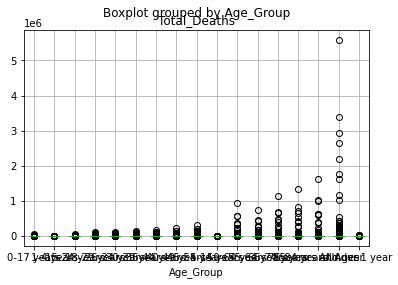

In [28]:
# Next I will create a box plot to check for outliers
updated_Covid_data.boxplot(by ='Age_Group', column ='Total_Deaths')

As seen above as the age of the individuals goes up so does the death count as seen in the graph the further to the right you go the larger the death rate rises. 

In [29]:
# Next I will use the shape function on the dataframe to get rid of 
# outliers and create a new data frame for the COVID_19_Deaths column
Second_orig_Covid_data = Remove_Outlier_Data.shape
Second_updated_Covid_data = Remove_Outlier_Data[np.isfinite(Remove_Outlier_Data['COVID_19_Deaths'])]
Second_new_Covid_data = Second_updated_Covid_data.shape

In [30]:
# Now I will print the size difference for the original data and 
# new data after the outliers have been removed by using the format
# function and prev and after. 
print("The original data was: {prev[0]} rows".format(prev=Second_orig_Covid_data))
print("The new data is: {after[0]} rows".format(after=Second_new_Covid_data))

The original data was: 66096 rows
The new data is: 49311 rows


<AxesSubplot:title={'center':'COVID_19_Deaths'}, xlabel='Age_Group'>

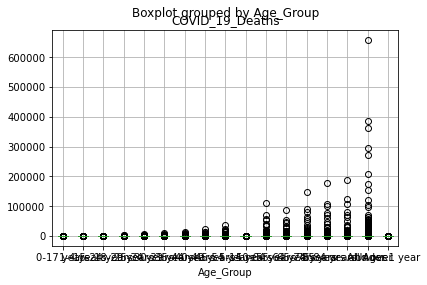

In [31]:
# Next I will create a box plot to check for outliers

Second_updated_Covid_data.boxplot(by ='Age_Group', column ='COVID_19_Deaths')

As seen above we have a similar output as the previous boxplot with age and death rate but for ourliers we can see anything above 150,000 would be considered an outlier if we took all age groups as a whole togehter. 

In [32]:
# After viewing the box plot I have determined to get rid of 
# outliers that are greater than 150,000
new_updated_Covid_data = Second_updated_Covid_data[(Second_updated_Covid_data['COVID_19_Deaths'] <= 150000)]
# Last I will print the update amount of data in the data frame
print("New updated Covid Data without outliers is: {}".format(*new_updated_Covid_data.shape))

New updated Covid Data without outliers is: 49301


## Find duplicates

In [33]:
# I will search and see if any of the columns have duplicate data 
# by using the format and duplicate function to state if the request is true or false
print("Is the 'State' duplictaed: {}".format(any(new_updated_Covid_data.State.duplicated())))
print("Is the 'Age_Group' duplictaed: {}".format(any(new_updated_Covid_data.Age_Group.duplicated())))
print("Is the 'COVID_19_Deaths' duplictaed: {}".format(any(new_updated_Covid_data.COVID_19_Deaths.duplicated())))
print("Is the 'Pneumonia_Deaths' duplictaed: {}".format(any(new_updated_Covid_data.Pneumonia_Deaths.duplicated())))
print("Is the 'Pneumonia_and_COVID_19_Deaths' duplictaed: {}".format(any(new_updated_Covid_data.Pneumonia_and_COVID_19_Deaths.duplicated())))
print("Is the 'Influenza_Deaths' duplictaed: {}".format(any(new_updated_Covid_data.Influenza_Deaths.duplicated())))
print("Is the 'Pneumonia_Influenza_and_COVID_19_Deaths' duplictaed: {}".format(any(new_updated_Covid_data.Pneumonia_Influenza_and_COVID_19_Deaths.duplicated())))

Is the 'State' duplictaed: True
Is the 'Age_Group' duplictaed: True
Is the 'COVID_19_Deaths' duplictaed: True
Is the 'Pneumonia_Deaths' duplictaed: True
Is the 'Pneumonia_and_COVID_19_Deaths' duplictaed: True
Is the 'Influenza_Deaths' duplictaed: True
Is the 'Pneumonia_Influenza_and_COVID_19_Deaths' duplictaed: True


As seen above we see that each of the columns has duplicated data which is understandable for the death rates as we have a lot of lines of data so it is bound to have repeats. As for the columns state and age group the reason for duplicates is due to the fact that there is data for multiple years, genders, and even states as this will cause us to have each age repeat for each state, year, and or gender.

## Fix casing or inconsistent values

In [34]:
# First I will use .drop to get rid of useless columns such 
# as the notes as we only see one note and it does not help.
# and also the date pulled as that only gives us the date the 
# data was pulled
drop_column = ['Date_Pulled','Notes']
new_updated_Covid_data.drop(drop_column, inplace=True, axis=1)

/Users/Robyn/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
new_updated_Covid_data.head()

,Start Date,End Date,Group,Year,Month,State,Sex,Age_Group,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_and_COVID_19_Deaths,Influenza_Deaths,Pneumonia_Influenza_and_COVID_19_Deaths
1,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,Under 1 year,105.0,31744.0,344.0,13.0,22.0,458.0
2,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,0-17 years,439.0,56092.0,949.0,103.0,188.0,1473.0
3,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,1-4 years,54.0,5881.0,192.0,11.0,65.0,300.0
4,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,5-14 years,145.0,9374.0,275.0,43.0,80.0,457.0
5,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,15-24 years,1297.0,60337.0,1363.0,529.0,80.0,2206.0


In [36]:
# Next I will take a closer look at State column and 
# see if I can see any inconsistent values
States = new_updated_Covid_data['State'].unique()
States.sort()
States

array(['Alabama', 'Alaska', 'Alaskaa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'New York City', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'United States', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

As seen above it seems as if we have an inconsistent value for "Alaska" as it is also misspelled "Alaskaa" in our states column. Now I am going to check the genders and see if we have any inconsistent values.

In [37]:
# Next I will take a closer look at Sex column and 
# see if I can see any inconsistent values
Gender = new_updated_Covid_data['Sex'].unique()
Gender.sort()
Gender

array(['All Sexes', 'Female', 'Male', 'Malle'], dtype=object)

As seen above it seems as if we have an inconsistent value with the sex column in regards to "male" values as it is spelled also with two Ls "malle". Which we will have to fix later with Fuzzy matching. Next I am going to check the Age column and see if we have any inconsistent values with that column.

In [38]:
# Next I will take a closer look at the Age Group column and 
# see if I can see any inconsistent values
Ages = new_updated_Covid_data['Age_Group'].unique()
Ages.sort()
Ages

array(['0-17 years', '1-4 years', '15-24 years', '18-29 years',
       '25-34 years', '30-39 years', '35-44 years', '40-49 years',
       '45-54 years', '5-14 years', '50-64 years', '55-64 years',
       '65-74 years', '75-84 years', '85 years and over', 'All Ages',
       'Under 1 year'], dtype=object)

In the age groups I am not seeing any issues that are visible at the moment.

In [39]:
# Last I will take a closer look at the Group column and 
# see if I can see any inconsistent values
Groups = new_updated_Covid_data['Group'].unique()
Groups.sort()
Groups

array(['By Month', 'By Total', 'By Year'], dtype=object)

As seen above we do not have any seen inconsistent issues.

## Conduct Fuzzy Matching

In [40]:
# The first match I will look at is to see the top 5 closest matches 
# to "alaska" and see what we get. By using Fuzzywuzzy and the 
# .processand .extract function
match = fuzzywuzzy.process.extract("Alaska", States, limit=5, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
match

[('Alaska', 100),
 ('Alaskaa', 92),
 ('Alabama', 62),
 ('Nebraska', 57),
 ('Kansas', 50)]

As seen above the first two items are very close to each other and we can see that it is just a typo. While the three other states below are not related to alaska and will not need to be changed. Next I will write a function to replace items that are above 90% which would consist of typos such as the one seen with Alaska.

In [41]:
# First I will create a function to allow me to replace items in columns
# from the dataframe that match above a 90% and have a limit of 5 closest
# matches to be pulled.
def match_replace (data_frame, column, string_match, min_ratio = 88):
    unique_strings = data_frame[column].unique()
    top_matches = fuzzywuzzy.process.extract(string_match, unique_strings,
                                             limit=5, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    near_matches = [top_matches[0] for top_matches in top_matches if top_matches[1]>= min_ratio]
    all_close_rows = data_frame[column].isin(near_matches)
    data_frame.loc[all_close_rows, column] = string_match
    print("Match Updated")

In [42]:
# Now I will use the function to replace the close match that is 
# above 90% for "Alaska"
match_replace(data_frame=new_updated_Covid_data, column='State', string_match="Alaska")

Match Updated


/Users/Robyn/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [43]:
# Now we can check our work and see if we fixed our values for Alaska
States = new_updated_Covid_data['State'].unique()
States.sort()
States

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'New York City',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'United States', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

As seen above it looks as if we are in the clear and fuzzywuzzy did its job and replaced our "Alaskaa" to be "Alaska"

In [44]:
# Next we can check our sex column that we saw had a inconsistent value
# By using Fuzzywuzzy and the .processand .extract function.
match = fuzzywuzzy.process.extract("Male", Gender, limit=5, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
match

[('Male', 100), ('Malle', 89), ('Female', 80), ('All Sexes', 46)]

In [45]:
# Now I will use the function to replace the close match for "male" but
# this time I will need to update my function to match above 88% being
# our typo "malle" matched at 89%.
match_replace(data_frame=new_updated_Covid_data, column='Sex', string_match="Male")

Match Updated


In [46]:
# Last but not least we can now check our work and see if we fixed 
# the values for "Male"
Gender = new_updated_Covid_data['Sex'].unique()
Gender.sort()
Gender

array(['All Sexes', 'Female', 'Male'], dtype=object)

In conclusion it is shown that the use of Fuzzywuzzy has fixed the inconsistent value issues that we had for both the States and Sex columns. 

In [47]:
new_updated_Covid_data

,Start Date,End Date,Group,Year,Month,State,Sex,Age_Group,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_and_COVID_19_Deaths,Influenza_Deaths,Pneumonia_Influenza_and_COVID_19_Deaths
1,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,Under 1 year,105.0,31744.0,344.0,13.0,22.0,458.0
2,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,0-17 years,439.0,56092.0,949.0,103.0,188.0,1473.0
3,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,1-4 years,54.0,5881.0,192.0,11.0,65.0,300.0
4,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,5-14 years,145.0,9374.0,275.0,43.0,80.0,457.0
5,1/1/20,9/11/21,By Total,NaN,NaN,United States,All Sexes,15-24 years,1297.0,60337.0,1363.0,529.0,80.0,2206.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66091,9/1/21,9/11/21,By Month,2021.0,September,Puerto Rico,Female,50-64 years,0.0,0.0,0.0,0.0,0.0,0.0
66092,9/1/21,9/11/21,By Month,2021.0,September,Puerto Rico,Female,55-64 years,0.0,0.0,0.0,0.0,0.0,0.0
66093,9/1/21,9/11/21,By Month,2021.0,September,Puerto Rico,Female,65-74 years,0.0,0.0,0.0,0.0,0.0,0.0
66094,9/1/21,9/11/21,By Month,2021.0,September,Puerto Rico,Female,75-84 years,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# First I will import the SQLite
import sqlite3

In [65]:
from sqlalchemy import create_engine

In [82]:
# Next I will create the connection using the imported create_engine 
# function and then invoking the connect method on it.
engine = create_engine('sqlite:///save_pandas.db', echo=True)
sqlite_connection = engine.connect()

In [83]:
sqlite_table = "Covid19_Deaths"
new_updated_Covid_data.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2021-11-07 11:48:55,396 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Covid19_Deaths")
2021-11-07 11:48:55,397 INFO sqlalchemy.engine.Engine [raw sql] ()


ValueError: Table 'Covid19_Deaths' already exists.

In [75]:
# Next I will close the database connection.
sqlite_connection.close()

In [69]:
pip install sqlalchemy==1.3.15

Note: you may need to restart the kernel to use updated packages.


In [76]:
# Next we will take a look at the data through the sqlite3 command 
# line viewer to make sure it was properly saved to the SQLite file
sqlite3

<module 'sqlite3' from '/Users/Robyn/opt/anaconda3/lib/python3.8/sqlite3/__init__.py'>

In [84]:
# Next I will open my data frame back up from sql lite
# Read sqlite query results into a pandas DataFrame
df = pd.read_sql_query("select * from Covid19_Deaths", sqlite_connection)

# Verify that result of SQL query is stored in the dataframe
print(df.head())

2021-11-07 11:49:09,464 INFO sqlalchemy.engine.Engine select * from Covid19_Deaths
2021-11-07 11:49:09,468 INFO sqlalchemy.engine.Engine [raw sql] ()
   index Start Date End Date     Group  Year Month          State        Sex  \
0      1     1/1/20  9/11/21  By Total   NaN  None  United States  All Sexes   
1      2     1/1/20  9/11/21  By Total   NaN  None  United States  All Sexes   
2      3     1/1/20  9/11/21  By Total   NaN  None  United States  All Sexes   
3      4     1/1/20  9/11/21  By Total   NaN  None  United States  All Sexes   
4      5     1/1/20  9/11/21  By Total   NaN  None  United States  All Sexes   

      Age_Group  COVID_19_Deaths  Total_Deaths  Pneumonia_Deaths  \
0  Under 1 year            105.0       31744.0             344.0   
1    0-17 years            439.0       56092.0             949.0   
2     1-4 years             54.0        5881.0             192.0   
3    5-14 years            145.0        9374.0             275.0   
4   15-24 years           129